In [114]:
# Importing testfunctions and algorithms
import numpy as np
import matplotlib.pyplot as plt
import time

import TestFunctionsAndBoundaries.TestFunctions as tf

from Algorithms.PSO import PSO
from Algorithms.GA import GA
from Algorithms.SA import SA
from Algorithms.TS import TS 



In [104]:
## Tuning parameters

dim = 5
fn = tf.Sum_squares
bound = tf.Sum_squares_bounds
print(bound)


values = []
random_start = time.time()
for i in range(500000): 
    point = np.random.uniform(bound[0], bound[1], dim)
    values.append(fn(point))    
random_time = round(time.time() - random_start, 4)

print("time: ",  random_time,  " res: ",min(values))
print("-----")

SA_start = time.time()
## L is usually number of dims and a 0.9
res_SA = fn(SA(fn, bound, dim, T = 10, L = 50, a = 0.90, iterations = 100))
SA_time = round(time.time() - SA_start, 4)
print("time: ",  SA_time,  " res: ",res_SA)

TS_start = time.time()
res_TS = fn(TS(fn, bound, dim, m = 10, n_neighbors = 5, h0 = 0.1, iterations = 2000))
TS_time = round(time.time() - TS_start, 4)
print("time: ",  TS_time,  " res: ",res_TS)

GA_start = time.time()
res_GA = fn(GA(fn, bound, dim, n_pop = 10, x_rate = 0.5, mutation_rate = 0.01, iterations = 3000))
GA_time = round(time.time() - GA_start, 4)
print("time: ",  GA_time,  " res: ",res_GA)

PSO_start = time.time()
res_PSO = fn(PSO(fn, bound, dim, n_particles = 20, w = 0.73, c1 = 2.05, c2 = 2.05, v_max = 10, iterations = 250))
PSO_time = round(time.time() - PSO_start, 4)
print("time: " , PSO_time, " res: ", res_PSO)



[-10, 10]
time:  2.5899  res:  1.415155722440853
-----
time:  0.1181  res:  0.546613058163573
time:  0.5324  res:  0.006144971613822941
time:  0.2882  res:  0.019622430108173036
time:  0.054  res:  0.0


In [115]:
### PARAMETERS 
function_params = [("Sphere", tf.Sphere, tf.Sphere_bounds, tf.Sphere_opt), 
                       ("Elliptic", tf.Elliptic, tf.Elliptic_bounds, tf.Elliptic_opt),
                       ("Rastrigin", tf.Rastrigin, tf.Rastrigin_bounds, tf.Rastrigin_opt),
                       ("Ackley", tf.Ackley, tf.Ackley_bounds, tf.Ackley_opt),
                       ("Schwefel_1_2", tf.Schwefel_1_2, tf.Schwefel_1_2_bounds, tf.Schwefel_1_2_opt),
                       ("Schwefel", tf.Schwefel, tf.Schwefel_bounds, tf.Schwefel_opt),
                       ("Rosenbrock", tf.Rosenbrock, tf.Rosenbrock_bounds, tf.Rosenbrock_opt),
                       ("Griewank", tf.Griewank, tf.Griewank_bounds, tf.Griewank_opt),
                       ("Sum_of_different_powers", tf.Sum_of_different_powers, tf.Sum_of_different_powers_bounds, tf.Sum_of_different_powers_opt),
                       ("Sum_squares", tf.Sum_squares, tf.Sum_squares_bounds, tf.Sum_squares_opt)]

    
algorithm_params = [("Sphere", {"T":100, "L": 50, "a": 0.90, "iterations": 2500}, 
                                   {"m" : 5, "n_neighbors" : 5, "h0" : 0.05, "iterations" : 15000}, 
                                   {"n_pop": 10, "x_rate": 0.5, "mutation_rate": 0.01, "iterations" : 25000}, 
                                   {"n_particles": 20, "w" : 0.73, "c1": 2.05, "c2": 2.05, "v_max": 0.1, "iterations": 14000},
                                   {"iterations": 540000}), 
                        
                       ("Elliptic", {"T":100, "L": 50, "a": 0.90, "iterations": 1800}, 
                                   {"m" : 10, "n_neighbors" : 5, "h0" : 1, "iterations" : 10000}, 
                                   {"n_pop": 10, "x_rate": 0.5, "mutation_rate": 0.01, "iterations" : 25000}, 
                                   {"n_particles": 20, "w" : 0.73, "c1": 2.05, "c2": 2.05, "v_max": 100, "iterations": 9000},
                                   {"iterations": 410000}),
                        
                       ("Rastrigin", {"T":100, "L": 50, "a": 0.90, "iterations": 1400}, 
                                   {"m" : 20, "n_neighbors" : 5, "h0" : 0.05, "iterations" : 6500}, 
                                   {"n_pop": 10, "x_rate": 0.5, "mutation_rate": 0.01, "iterations" : 16000}, 
                                   {"n_particles": 20, "w" : 0.73, "c1": 2.05, "c2": 2.05, "v_max": 0.1, "iterations": 4500},
                                   {"iterations": 240000}),
                        
                       ("Ackley", {"T":100, "L": 50, "a": 0.90, "iterations": 1200}, 
                                   {"m" : 20, "n_neighbors" : 5, "h0" : 0.05, "iterations" : 5500}, 
                                   {"n_pop": 10, "x_rate": 0.5, "mutation_rate": 0.01, "iterations" : 16000}, 
                                   {"n_particles": 20, "w" : 0.73, "c1": 5, "c2": 5, "v_max": 1, "iterations": 3200},
                                   {"iterations": 200000}),
                    
                       ("Schwefel_1_2", {"T":100, "L": 50, "a": 0.90, "iterations": 1600}, 
                                   {"m" : 20, "n_neighbors" : 5, "h0" : 1, "iterations" : 6000}, 
                                   {"n_pop": 20, "x_rate": 0.5, "mutation_rate": 0.01, "iterations" : 12000}, 
                                   {"n_particles": 20, "w" : 0.73, "c1": 2.05, "c2": 2.05, "v_max": 100, "iterations": 6000},
                                   {"iterations": 330000}),
                        
                       ("Schwefel", {"T":100, "L": 50, "a": 0.90, "iterations": 1100}, 
                                   {"m" : 20, "n_neighbors" : 5, "h0" : 1, "iterations" : 5500}, 
                                   {"n_pop": 10, "x_rate": 0.5, "mutation_rate": 0.01, "iterations" : 16000}, 
                                   {"n_particles": 20, "w" : 0.73, "c1": 5, "c2": 5, "v_max": 100, "iterations": 3200},
                                   {"iterations": 210000}),
                    
                       ("Rosenbrock", {"T":100, "L": 50, "a": 0.90, "iterations": 1800}, 
                                   {"m" : 20, "n_neighbors" : 5, "h0" : 0.1, "iterations" : 6000}, 
                                   {"n_pop": 10, "x_rate": 0.5, "mutation_rate": 0.01, "iterations" : 21000}, 
                                   {"n_particles": 20, "w" : 0.73, "c1": 5, "c2": 5, "v_max": 0.1, "iterations": 6300},
                                   {"iterations": 350000}),
                    
                       ("Griewank", {"T":100, "L": 50, "a": 0.90, "iterations": 700}, 
                                   {"m" : 20, "n_neighbors" : 5, "h0" : 1, "iterations" : 5000}, 
                                   {"n_pop": 10, "x_rate": 0.5, "mutation_rate": 0.01, "iterations" : 10000}, 
                                   {"n_particles": 20, "w" : 0.73, "c1": 5, "c2": 5, "v_max": 10, "iterations": 1800},
                                   {"iterations": 100000}),
                        
                       ("Sum_of_different_powers", {"T":100, "L": 50, "a": 0.90, "iterations": 2400}, 
                                   {"m" : 10, "n_neighbors" : 5, "h0" : 0.01, "iterations" : 10000}, 
                                   {"n_pop": 10, "x_rate": 0.5, "mutation_rate": 0.01, "iterations" : 30000}, 
                                   {"n_particles": 20, "w" : 0.73, "c1": 2.05, "c2": 2.05, "v_max": 1, "iterations": 13000},
                                   {"iterations": 500000}),
                    
                       ("Sum_squares",{"T":10, "L": 50, "a": 0.90, "iterations": 2400}, 
                                   {"m" : 10, "n_neighbors" : 5, "h0" : 0.1, "iterations" : 10000}, 
                                   {"n_pop": 10, "x_rate": 0.5, "mutation_rate": 0.01, "iterations" : 27000}, 
                                   {"n_particles": 20, "w" : 0.73, "c1": 2.05, "c2": 2.05, "v_max": 10, "iterations": 12000},
                                   {"iterations": 490000})]

In [116]:
# Generating data 

dims = 5
runs = 50

for fp, ap in zip(function_params, algorithm_params):
    assert(fp[0] == ap[0])
    print(f"{fp[0]}, optimal value: {fp[3]} \n")
    names = ["SA", "TS", "GA", "PSO"]
    
    SA_start = time.time()
    SA(fp[1], fp[2], dims, T = ap[1]["T"], L = ap[1]["L"], a = ap[1]["a"], iterations = ap[1]["iterations"])
    SA_time = round(time.time() - SA_start,4)
    
    TS_start = time.time()
    TS(fp[1], fp[2], dims, m = ap[2]["m"], n_neighbors = ap[2]["n_neighbors"], h0 = ap[2]["h0"], iterations = ap[2]["iterations"])
    TS_time = round(time.time() - TS_start,4)
    
    GA_start = time.time()
    GA(fp[1], fp[2], dims, n_pop = ap[3]["n_pop"], x_rate = ap[3]["x_rate"], mutation_rate = ap[3]["mutation_rate"], iterations = ap[3]["iterations"])
    GA_time = round(time.time() - GA_start,4)
    
    PSO_start = time.time()
    PSO(fp[1], fp[2], dims, n_particles = ap[4]["n_particles"], w = ap[4]["w"], c1 = ap[4]["c1"], c2 = ap[4]["c2"], v_max = ap[4]["v_max"], iterations = ap[4]["iterations"])
    PSO_time = round(time.time() - PSO_start,4)
    
    print(f"SA time: {SA_time}, TS time: {TS_time}, GA time: {GA_time}, PSO time: {PSO_time}")
    
    fastest = np.argmin([SA_time, TS_time, GA_time, PSO_time])
    slowest = np.argmax([SA_time, TS_time, GA_time, PSO_time])
    
    print(f"Fastest: {names[fastest]}, slowest: {names[slowest]} \n")
    
    RNG_values = []
    for i in range(runs): 
        RNG_run = []
        for i in range(ap[5]["iterations"]): 
            point = np.random.uniform(fp[2][0], fp[2][1], dims)
            RNG_run.append(fp[1](point))
        RNG_values.append(min(RNG_run))
    print(f"RNG mean: {np.mean(RNG_values)}, RNG std: {np.std(RNG_values)}, RNG best: {min(RNG_values)}")
    
    TS_values = []
    for i in range(runs): 
        point = TS(fp[1], fp[2], dims, m = ap[2]["m"], n_neighbors = ap[2]["n_neighbors"], h0 = ap[2]["h0"], iterations = ap[2]["iterations"])
        fit_value = fp[1](point)
        TS_values.append(fit_value)
    print(f"TS mean: {np.mean(TS_values)}, TS std: {np.std(TS_values)}, TS best: {min(TS_values)}")
    
    SA_values = []
    for i in range(runs): 
        point = SA(fp[1], fp[2], dims, T = ap[1]["T"], L = ap[1]["L"], a = ap[1]["a"], iterations = ap[1]["iterations"])
        fit_value = fp[1](point)
        SA_values.append(fit_value)
    print(f"SA mean: {np.mean(SA_values)}, SA std: {np.std(SA_values)}, SA best: {min(SA_values)}")
    
    GA_values = []
    for i in range(runs): 
        point = GA(fp[1], fp[2], dims, n_pop = ap[3]["n_pop"], x_rate = ap[3]["x_rate"], mutation_rate = ap[3]["mutation_rate"], iterations = ap[3]["iterations"])
        fit_value = fp[1](point)
        GA_values.append(fit_value)
    print(f"GA mean: {np.mean(GA_values)}, GA std: {np.std(GA_values)}, GA best: {min(GA_values)}")
    
    PSO_values = []
    for i in range(runs): 
        point = PSO(fp[1], fp[2], dims, n_particles = ap[4]["n_particles"], w = ap[4]["w"], c1 = ap[4]["c1"], c2 = ap[4]["c2"], v_max = ap[4]["v_max"], iterations = ap[4]["iterations"])
        fit_value = fp[1](point)
        PSO_values.append(fit_value)
    print(f"PSO mean: {np.mean(PSO_values)}, PSO std: {np.std(PSO_values)}, PSO best: {min(PSO_values)} \n")
    
    means = [np.mean(SA_values), np.mean(TS_values), np.mean(GA_values), np.mean(PSO_values)]
    best_vals =[min(SA_values), min(TS_values), min(GA_values), min(PSO_values)]
    best_mean = np.argmin(means) 
    best_val = np.argmin(best_vals)
    print(f"Best average: {names[best_mean]}, value: {means[best_mean]}")
    print(f"Best val: {names[best_val]}, value: {best_vals[best_val]}")
    
    np.save(f'{fp[0]}_{dims}Dims_{runs}Runs_SA.npy', SA_values)
    np.save(f'{fp[0]}_{dims}Dims_{runs}Runs_TS.npy', TS_values)
    np.save(f'{fp[0]}_{dims}Dims_{runs}Runs_GA.npy', GA_values)
    np.save(f'{fp[0]}_{dims}Dims_{runs}Runs_PSO.npy', PSO_values)
    np.save(f'{fp[0]}_{dims}Dims_{runs}Runs_RNG.npy', RNG_values)
    
    print("-------------------------------------------------------------------------")


Sphere, optimal value: 0 

SA time: 2.5448, TS time: 2.4629, GA time: 2.2686, PSO time: 2.6739
Fastest: GA, slowest: PSO 

RNG mean: 0.24245157120895292, RNG std: 0.09744753148966334, RNG best: 0.060638025969851975
TS mean: 0.00027937116669001985, TS std: 0.00012789484620446198, TS best: 6.961402173551863e-05
SA mean: 0.027933980643237002, SA std: 0.013471119557941244, SA best: 0.002917870067140636
GA mean: 7.813559553608028e-06, GA std: 9.57749047087012e-06, GA best: 2.814146052073796e-07
PSO mean: 9.57221759729667e-10, PSO std: 6.934875459983099e-10, PSO best: 1.0376479275931671e-10 

Best average: PSO, value: 9.57221759729667e-10
Best val: PSO, value: 1.0376479275931671e-10
-------------------------------------------------------------------------
Elliptic, optimal value: 0 

SA time: 2.3777, TS time: 2.6034, GA time: 2.6189, PSO time: 2.5608
Fastest: SA, slowest: GA 

RNG mean: 1769.40637091591, RNG std: 838.6113754792437, RNG best: 268.1780478782114
TS mean: 63.364850099139495, TS 

In [11]:
#Loading data
d = np.load('Rosenbrock_50Dims_250Runs_PSO.npy')


250

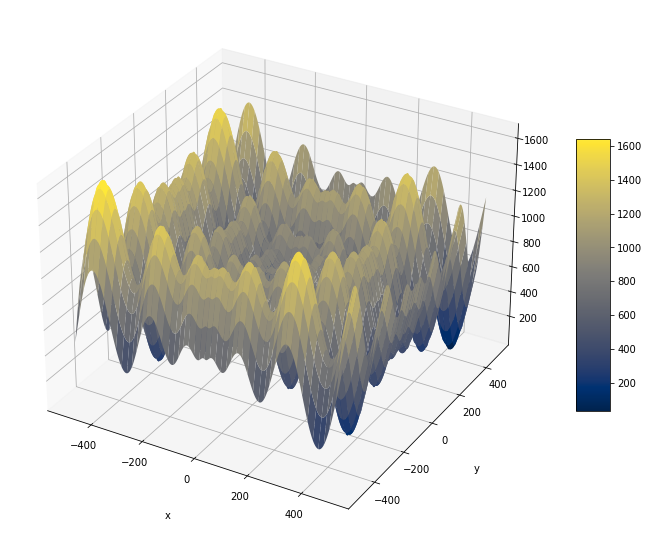

In [46]:
bounds = tf.Schwefel_bounds
func = tf.Schwefel

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.arange(bounds[0], bounds[1], 1)
y = np.arange(bounds[0], bounds[1], 1)
#x = np.arange(-10, 10, 1)
#y = np.arange(-10, 10, 1)

X, Y = np.meshgrid(x, y)

Z = np.array([[func([x,y]) for x, y in zip(x_list,y_list)] for x_list, y_list in zip(X,Y)])

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

In [50]:
# Testing visualization data output 
its = 10

data_viz_PSO = PSO(tf.Sphere, tf.Sphere_bounds, 3, iterations = its, visualize = True)
print(data_viz_PSO, "\n")

data_viz_GA = GA(tf.Sphere, tf.Sphere_bounds, 3, iterations = its, visualize = True)
print(data_viz_GA, "\n")

data_viz_TS = TS(tf.Sphere, tf.Sphere_bounds, 3, iterations = its, visualize = True)
print(data_viz_TS, "\n")

data_viz_SA = SA(tf.Sphere, tf.Sphere_bounds, 3, iterations = its,  visualize = True)
print(data_viz_SA, "\n")



[array([-0.16699833,  2.88752658,  0.57409445]), array([0.37329432, 1.8969125 , 1.55225175]), array([-1.45142771,  0.50192532,  0.64339319]), array([ 0.37329432,  0.7302402 , -0.28123809]), array([-0.66926705,  0.42211358, -0.13146062]), array([-0.66926705,  0.42211358, -0.13146062]), array([-0.14206709,  0.11149187, -0.35756773]), array([-0.15244788, -0.02861586, -0.24794522]), array([-0.08708952, -0.25859994, -0.01466628]), array([-0.08708952, -0.25859994, -0.01466628])] 

[array([ 1.05681944, -1.10075874,  1.15719212]), array([ 0.21828051, -1.10075874,  1.15719212]), array([ 0.73984651, -0.91400527,  0.31228208]), array([ 0.73984651, -0.91400527,  0.31228208]), array([ 0.73984651, -0.91400527,  0.31228208]), array([ 0.6910123 , -0.91400527,  0.31228208]), array([0.85959786, 0.18846153, 0.31228208]), array([0.85959786, 0.18846153, 0.31228208]), array([ 0.6910123 , -0.25748094,  0.31228208]), array([ 0.6910123 , -0.25748094,  0.31228208])] 

[array([-0.89186364, -0.0687398 ,  1.628843

In [4]:
dims = 50
runs = 50
its = 1000

counter = 1
for fp, ap in zip(function_params, algorithm_params):
    assert(fp[0] == ap[0])
    print(f"{fp[0]}, function {counter}, started")
    
    TS_values = np.zeros(its)
    for i in range(runs): 
        points = TS(fp[1], fp[2], dims, m = ap[2]["m"], n_neighbors = ap[2]["n_neighbors"], h0 = ap[2]["h0"], iterations = its, visualize = True)
        fit_vals = np.array([fp[1](point) / runs for point in points])
        TS_values += fit_vals
    
    SA_values = np.zeros(its)
    for i in range(runs): 
        points = SA(fp[1], fp[2], dims, T = ap[1]["T"], L = ap[1]["L"], a = ap[1]["a"], iterations = its, visualize = True)
        fit_vals = np.array([fp[1](point) / runs for point in points])
        SA_values += fit_vals

    
    GA_values = np.zeros(its)
    for i in range(runs): 
        points = GA(fp[1], fp[2], dims, n_pop = ap[3]["n_pop"], x_rate = ap[3]["x_rate"], mutation_rate = ap[3]["mutation_rate"], iterations = its, visualize = True)
        fit_vals = np.array([fp[1](point) / runs for point in points])
        GA_values += fit_vals

    
    PSO_values = np.zeros(its)
    for i in range(runs): 
        points = PSO(fp[1], fp[2], dims, n_particles = ap[4]["n_particles"], w = ap[4]["w"], c1 = ap[4]["c1"], c2 = ap[4]["c2"], v_max = ap[4]["v_max"], iterations = its, visualize = True)
        fit_vals = np.array([fp[1](point) / runs for point in points])
        PSO_values += fit_vals
    
    np.save(f'{fp[0]}_{dims}Dims_{its}its_{runs}Runs_SA_viz.npy', SA_values)
    np.save(f'{fp[0]}_{dims}Dims_{its}its_{runs}Runs_TS_viz.npy', TS_values)
    np.save(f'{fp[0]}_{dims}Dims_{its}its_{runs}Runs_GA_viz.npy', GA_values)
    np.save(f'{fp[0]}_{dims}Dims_{its}its_{runs}Runs_PSO_viz.npy', PSO_values)
    print(f"{fp[0]}, function {counter}, ended")
    counter += 1
    

Sphere, function 1, started
Sphere, function 1, ended
Elliptic, function 2, started
Elliptic, function 2, ended
Rastrigin, function 3, started
Rastrigin, function 3, ended
Ackley, function 4, started
Ackley, function 4, ended
Schwefel_1_2, function 5, started
Schwefel_1_2, function 5, ended
Schwefel, function 6, started
Schwefel, function 6, ended
Rosenbrock, function 7, started
Rosenbrock, function 7, ended
Griewank, function 8, started
Griewank, function 8, ended
Sum_of_different_powers, function 9, started
Sum_of_different_powers, function 9, ended
Sum_squares, function 10, started
Sum_squares, function 10, ended


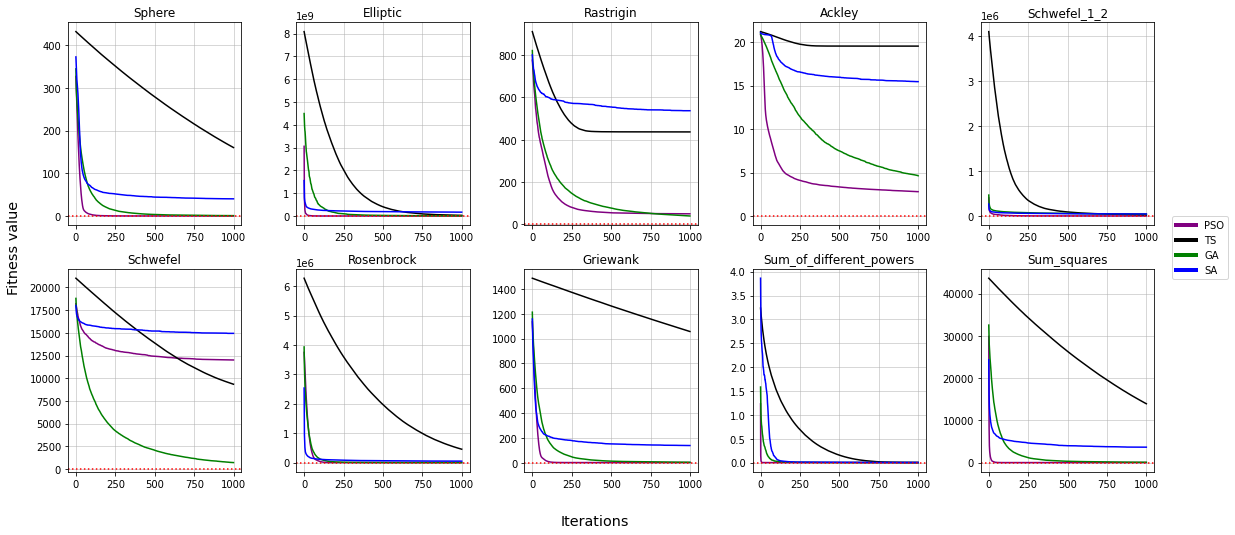

In [7]:
#### Params
from matplotlib.lines import Line2D

dims = 50
runs = 50
its = 1000

x_axis = 2
y_axis = 5

# For plots
fig, axs = plt.subplots(x_axis, y_axis, figsize=(16, 7))
plot_positions = [(x,y) for x in range(x_axis)for y in range(y_axis)]
iterations = list(range(its))

for fp, plot_pos,  in zip(function_params, plot_positions):
    
    pp1 = plot_pos[0]
    pp2 = plot_pos[1]
    
    # function name
    name = fp[0]
    
    #Loading data
    SA = np.load(f'{fp[0]}_{dims}Dims_{its}its_{runs}Runs_SA_viz.npy')
    TS = np.load(f'{fp[0]}_{dims}Dims_{its}its_{runs}Runs_TS_viz.npy')
    GA = np.load(f'{fp[0]}_{dims}Dims_{its}its_{runs}Runs_GA_viz.npy')
    PSO = np.load(f'{fp[0]}_{dims}Dims_{its}its_{runs}Runs_PSO_viz.npy')
     
    axs[pp1, pp2].plot(iterations, PSO, color = "purple")
    axs[pp1, pp2].plot(iterations, TS, color = "black")
    axs[pp1, pp2].plot(iterations, GA, color = "green")
    axs[pp1, pp2].plot(iterations, SA, color = "blue")
    axs[pp1, pp2].axhline(y=0.0, color='r', linestyle='dotted')
    axs[pp1, pp2].set_title(name)
    axs[pp1, pp2].grid(linewidth=0.5)

    
# Set labels
#for ax in axs.flat:
#    ax.set(xlabel='Iterations', ylabel='Fitness value')

# Hide x labels and tick labels for top plots and y ticks for right plots
#for ax in axs.flat:
#    ax.label_outer()


legend_elements = [Line2D([0], [0], color='purple', lw=4, label='Line'),
                   Line2D([0], [0], color='black', lw=4, label='Line'),
                  Line2D([0], [0], color='green', lw=4, label='Line'),
                  Line2D([0], [0], color='blue', lw=4, label='Line')]

# Create the figure

fig.legend(bbox_to_anchor=(1.05, 0.5), handles=legend_elements, labels = ["PSO", "TS", "GA", "SA"], loc='center right', borderaxespad=0)

fig.tight_layout()

fig.text(0.5, -0.05, 'Iterations', ha='center', fontsize = "x-large")
fig.text(-0.01, 0.5, 'Fitness value', va='center', rotation='vertical', fontsize = "x-large")

plt.savefig('test.png', bbox_inches='tight')